### Cuaderno de exploración del procesamiento inicial de fuentes
Este cuaderno desarrolla la exploración de las fuentes descargadas previamente de la pagina del DHIME del IDEAM. A partir de los ficheros descargados vamos a construir insumos para trabajar y realizar la auomatización del proceso.

In [16]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

Empezamos listando los archivos descargados para construir nuestro dataset base

In [17]:
import zipfile
import os
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

lista_zonas = ['SINÚ', 'BAJO_MAGDALENA', 'MAGDALENA_MEDIO', 'CARIBE_LITORAL']

# necesito obtener una lista con los elementos de la carpeta DatosEstaciones
path = '../RecursosYDocumentos/DatosEstaciones/'
for zona in lista_zonas:
    path_zone = f'{path}{zona}/'
    zip_files = os.listdir(path_zone)
    print(zip_files)


['datos (1).zip', 'datos (2).zip', 'datos (3).zip', 'datos.zip']
['datos (1).zip', 'datos (10).zip', 'datos (11).zip', 'datos (12).zip', 'datos (13).zip', 'datos (14).zip', 'datos (15).zip', 'datos (16).zip', 'datos (17).zip', 'datos (2).zip', 'datos (3).zip', 'datos (4).zip', 'datos (5).zip', 'datos (6).zip', 'datos (7).zip', 'datos (8).zip', 'datos (9).zip', 'datos.zip']
['datos (10).zip', 'datos (11).zip', 'datos (12).zip', 'datos (13).zip', 'datos (14).zip', 'datos (15).zip', 'datos (16).zip', 'datos (17).zip', 'datos (2).zip', 'datos (3).zip', 'datos (4).zip', 'datos (5).zip', 'datos (6).zip', 'datos (7).zip', 'datos (8).zip', 'datos (9).zip', 'datos .zip', 'datos.zip']
['datos (1).zip', 'datos (2).zip', 'datos (3).zip', 'datos (4).zip', 'datos (5).zip', 'datos (6).zip', 'datos.zip']


In [18]:
# Borramos la infor de la carpeta datos y todo su contenido usando python
import shutil
shutil.rmtree('../datos/sin_procesar', ignore_errors=True)

Descomprimimos los ficheros y los renombramos para evitar solapamientos entre los mismos.

In [19]:
# Eliminamos la carpeta datos recursivamente
for zona in lista_zonas:
    path_zone = f'{path}{zona}/'
    zip_files = os.listdir(path_zone)
    for n, file in enumerate(zip_files):
        with zipfile.ZipFile(f'{path_zone}{file}', 'r') as zip_ref:
            zip_ref.extractall(f'../datos/sin_procesar/{zona}')
        os.rename(f'../datos/sin_procesar/{zona}/excel.csv.csv', f'../datos/sin_procesar/{zona}/Archivo{n+1}_{zona}.csv')

Nos enfocaremos principalmente en la region del magdalena medio para la fase 1 del desarrollo de este proyecto, pero primero generaremos un conteo de estaciones por Zona Hidrográfica.

In [21]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

zonas = ['SINÚ', 'BAJO_MAGDALENA', 'MAGDALENA_MEDIO', 'CARIBE_LITORAL']

for zona in zonas:
    path_zone = f'../datos/sin_procesar/{zona}/'
    file_list = os.listdir(path_zone)
    df = pd.concat([pd.read_csv(f'{path_zone}{file}') for file in file_list])
    df = df[['CodigoEstacion', 'Valor']]
    print(zona)
    print(df.groupby("CodigoEstacion").count().count()[0])

SINÚ
36
BAJO_MAGDALENA
153
MAGDALENA_MEDIO
133
CARIBE_LITORAL
37


Procedemos ahora si a trabajar netamente con los datos del MAGDALENA MEDIO

In [22]:

zona = 'MAGDALENA_MEDIO'

path_zone = f'../datos/sin_procesar/{zona}/'
file_list = os.listdir(path_zone)
print(file_list)
df = pd.concat([pd.read_csv(f'{path_zone}{file}') for file in file_list])

df.head(5)

['Archivo10_MAGDALENA_MEDIO.csv', 'Archivo11_MAGDALENA_MEDIO.csv', 'Archivo12_MAGDALENA_MEDIO.csv', 'Archivo13_MAGDALENA_MEDIO.csv', 'Archivo14_MAGDALENA_MEDIO.csv', 'Archivo15_MAGDALENA_MEDIO.csv', 'Archivo16_MAGDALENA_MEDIO.csv', 'Archivo17_MAGDALENA_MEDIO.csv', 'Archivo18_MAGDALENA_MEDIO.csv', 'Archivo1_MAGDALENA_MEDIO.csv', 'Archivo2_MAGDALENA_MEDIO.csv', 'Archivo3_MAGDALENA_MEDIO.csv', 'Archivo4_MAGDALENA_MEDIO.csv', 'Archivo5_MAGDALENA_MEDIO.csv', 'Archivo6_MAGDALENA_MEDIO.csv', 'Archivo7_MAGDALENA_MEDIO.csv', 'Archivo8_MAGDALENA_MEDIO.csv', 'Archivo9_MAGDALENA_MEDIO.csv']


,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,23070020,RIO CLARO [23070020],5.855528,-74.848361,449,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 01 - Antioquia-Chocó,Antioquia,Sonsón,01/09/2009 00:00,NaN,PRECIPITACION,PTPM_TT_M,Precipitación total mensual,Mensual,2000-01-01 00:00,77.2,4,NaN,900
1,23070020,RIO CLARO [23070020],5.855528,-74.848361,449,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 01 - Antioquia-Chocó,Antioquia,Sonsón,01/09/2009 00:00,NaN,PRECIPITACION,PTPM_TT_M,Precipitación total mensual,Mensual,2000-02-01 00:00,265.1,50,NaN,900
2,23070020,RIO CLARO [23070020],5.855528,-74.848361,449,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 01 - Antioquia-Chocó,Antioquia,Sonsón,01/09/2009 00:00,NaN,PRECIPITACION,PTPM_TT_M,Precipitación total mensual,Mensual,2000-03-01 00:00,217.0,50,NaN,900
3,23070020,RIO CLARO [23070020],5.855528,-74.848361,449,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 01 - Antioquia-Chocó,Antioquia,Sonsón,01/09/2009 00:00,NaN,PRECIPITACION,PTPM_TT_M,Precipitación total mensual,Mensual,2000-04-01 00:00,508.5,50,NaN,900
4,23070020,RIO CLARO [23070020],5.855528,-74.848361,449,Pluviográfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 01 - Antioquia-Chocó,Antioquia,Sonsón,01/09/2009 00:00,NaN,PRECIPITACION,PTPM_TT_M,Precipitación total mensual,Mensual,2000-05-01 00:00,408.9,50,NaN,900


Nos concetramos en mantener las columnas de interes, que son Valor, Fecha, CodigoEstacion y NombreEstacion

In [6]:
columnas = ['CodigoEstacion', 'Fecha', 'Valor']
df_new = df[columnas]

# Casteamos la columna 'Fecha' a datetime y nos quedamos solo con la fecha
df_new['Fecha'] = pd.to_datetime(df_new['Fecha'])
df_new['Fecha'] = df_new['Fecha'].dt.date
# Casteamos la columna CodEstacion a string
df_new['CodigoEstacion'] = df_new['CodigoEstacion'].astype(str)

# Generamos un dataframe con los valores de las estaciones donde haya un unico valor por fecha y cada estacion sea una columna
# De esta forma aseguramos obtener los valores de las estaciones que no tenian datos para determiando mes
df_new = df_new.pivot(index='Fecha', columns='CodigoEstacion', values='Valor')
df_new.head(10)

CodigoEstacion,23010020,23010080,23020080,23020090,23020100,23025040,23040070,23050080,23050100,23050230,23050250,23055040,23055070,23060110,23060140,23060150,23060160,23060170,23060180,23060190,23060200,23060260,23060290,23060370,23065120,23070010,23070020,23080390,23080640,23080650,23080720,23080740,23080750,23080760,23080810,23080820,23080920,23080940,23085030,23085080,23085110,23085140,23085160,23085220,23085270,23090020,23090110,23100030,23100040,23100050,23100070,23105030,23110030,23110040,23110060,23115010,23120010,23120050,23120200,23120210,23120220,23120240,23120250,23125040,23125050,23125060,23125080,23125090,23125100,23125120,23125130,23125140,23125150,23130010,23140070,23145020,23155030,23155040,23160010,23175020,23180020,23180040,23180050,23180070,23180080,23180100,23180110,23180120,23185010,23190110,23190130,23190140,23190210,23190260,23190280,23190300,23190320,23190340,23190350,23190360,23190380,23190400,23190440,23190450,23190480,23190500,23190510,23190520,23190540,23190560,23190580,23190590,23190600,23190700,23190710,23190810,23190830,23195110,23195180,23195502,23200010,23200060,23205020,23205030,23210010,23210020,23210120,23210130,23210160,23215030,23215050,25020970,26155150
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,141.0,25.0,255.4,98.0,245.8,201.4,621.2,235.0,25.0,132.2,88.0,491.5,410.8,NaN,37.0,22.9,72.2,NaN,35.9,NaN,175.9,104.4,174.7,NaN,91.1,47.0,77.2,117.0,62.0,86.0,51.8,133.0,206.0,82.0,110.0,81.0,62.4,NaN,108.6,34.8,87.4,201.0,106.0,118.6,108.3,31.0,80.0,74.0,49.2,30.0,79.0,48.3,44.9,68.0,37.0,36.2,94.0,47.5,40.0,171.4,38.3,194.7,40.4,56.2,113.6,121.3,171.2,85.1,68.2,95.5,193.4,79.1,128.2,89.0,113.0,133.6,36.2,77.1,6.0,105.6,6.0,40.0,18.0,37.0,12.0,0.0,0.0,0.0,21.3,37.0,97.0,134.0,11.0,NaN,107.0,39.0,78.0,70.4,205.0,228.0,183.0,340.0,NaN,28.0,5.0,40.0,60.0,11.0,67.0,9.0,55.0,124.7,95.0,167.6,0.0,25.0,173.1,109.6,20.3,253.1,0.0,0.0,0.4,0.0,0.0,15.0,11.0,0.0,0.0,1.3,101.0,NaN,102.3
2000-02-01,318.0,100.0,441.7,165.0,244.9,264.1,467.8,347.0,290.7,346.0,220.0,698.5,545.4,NaN,220.2,177.9,168.5,280.6,218.8,NaN,327.8,228.5,221.7,NaN,170.8,133.8,265.1,NaN,180.0,166.0,120.2,132.0,228.0,169.0,105.0,198.0,139.7,NaN,184.8,84.9,156.7,356.0,209.0,262.3,144.8,NaN,5.0,123.0,61.7,81.0,70.0,147.8,175.9,261.0,186.0,163.8,519.0,145.7,149.0,376.3,111.7,306.7,98.7,190.7,74.2,234.0,279.0,175.1,138.9,361.4,225.9,195.0,217.2,94.0,208.0,187.1,168.5,172.5,55.0,229.7,114.0,164.0,160.0,137.0,102.0,73.0,152.0,35.0,83.9,74.0,102.0,242.0,74.0,NaN,138.0,139.0,242.0,56.4,190.0,210.0,286.0,162.0,NaN,84.0,64.0,166.0,143.0,50.0,107.0,130.0,32.0,184.1,154.0,147.1,11.0,104.0,109.0,106.7,44.4,223.1,30.0,23.0,150.3,7.0,12.0,43.0,35.0,72.0,2.0,41.5,140.4,NaN,114.1
2000-03-01,325.0,89.0,334.3,157.0,189.2,168.8,680.3,451.0,191.5,423.0,371.0,1034.8,615.9,NaN,172.4,339.9,162.7,130.2,340.4,133.5,239.4,218.4,355.3,NaN,238.7,161.0,217.0,198.0,151.0,182.0,223.9,220.0,434.0,186.0,188.0,560.0,182.6,NaN,264.6,87.9,255.5,388.0,218.7,280.1,119.6,166.0,125.0,81.0,78.7,154.0,161.0,93.3,177.6,185.0,302.0,192.4,253.0,185.2,187.0,301.6,197.0,365.9,110.2,229.2,132.4,273.7,299.1,287.9,238.0,270.0,207.5,264.1,294.4,249.0,278.0,145.3,75.1,160.7,74.0,144.2,108.0,112.0,135.0,204.0,75.0,26.0,170.0,199.0,261.1,63.0,80.0,138.0,158.0,NaN,80.0,57.0,108.0,125.4,114.0,245.0,134.0,145.0,NaN,40.0,38.0,129.0,178.0,60.0,101.0,209.0,25.0,123.3,61.0,133.7,0.0,74.0,158.5,73.1,47.1,33.0,5.0,0.0,94.3,4.6,0.0,39.0,29.0,50.0,32.0,27.3,15.0,NaN,72.8
2000-04-01,256.0,137.0,300.9,173.0,440.7,539.2,698.0,237.0,301.6,265.9,505.0,780.6,491.3,140.0,137.7,170.5,285.6,253.9,277.9,88.2,125.8,228.0,244.8,NaN,78.2,282.0,508.5,390.6,149.0,321.0,220.7,237.0,524.0,275.5,NaN,424.0,201.4,272.0,421.1,197.5,243.3,403.0,347.0,346.5,140.9,242.0,233.0,179.0,212.1,184.9,191.0,189.6,204.7,252.0,398.0,247.1,435.0,251.6,384.0,336.5,137.2,353.4,166.0,222.5,381.1,306.0,330.3,299.4,112.5,311.5,211.9,283.4,

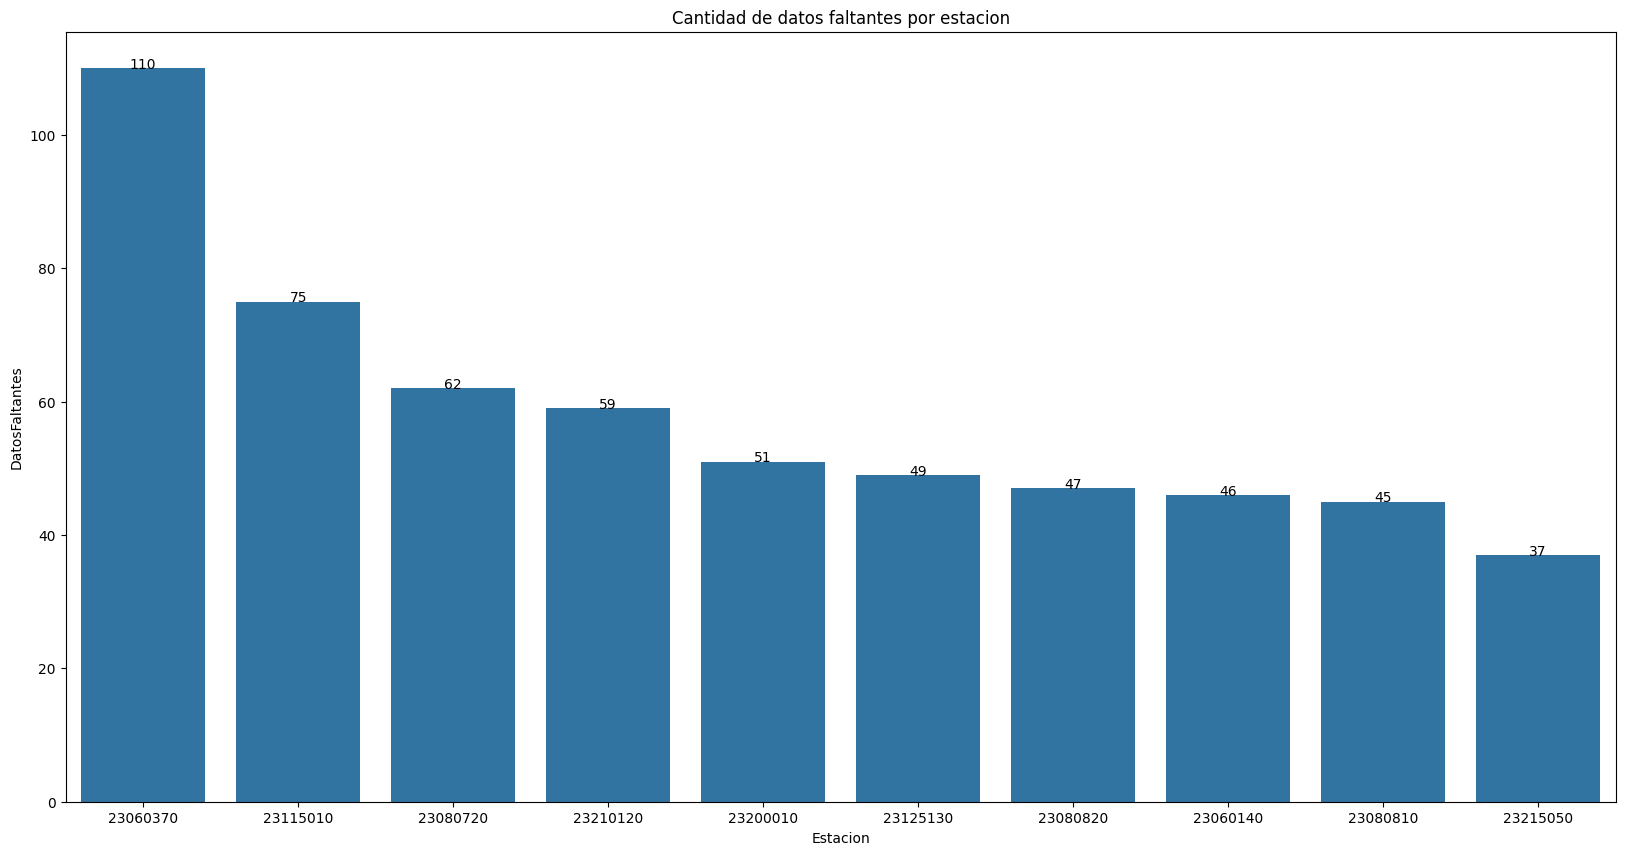

In [7]:
# Generamos un dataframe unicamente con las estaciones que tienen datos faltantes
df_with_na = df_new.loc[:, df_new.isnull().any()]
df_with_na.head(10)

# Agrupamos la cantidad de datos faltantes por estacion y generamos un grafico de barras
missing_data = df_with_na.isnull().sum()
missing_data = missing_data.sort_values(ascending=False)
missing_data = missing_data.reset_index()
missing_data.columns = ['Estacion', 'DatosFaltantes']
missing_data = missing_data.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='Estacion', y='DatosFaltantes', data=missing_data)
plt.title('Cantidad de datos faltantes por estacion')
# Agregamos el porcentaje de datos faltantes al interior en cada barra
for index, row in missing_data.iterrows():
    plt.text(row.name, row.DatosFaltantes, round(row.DatosFaltantes, 2), color='black', ha='center')
plt.show()

Generamos una primera fase los datos de las estaciones, para ello imputamos los valores tomando la media de cada fecha

In [8]:
# Imputamos iterativamente los valores faltantes de las estaciones
df_new_g = df_new.interpolate(method='linear', axis=0)
df_new_g.head(10)

CodigoEstacion,23010020,23010080,23020080,23020090,23020100,23025040,23040070,23050080,23050100,23050230,23050250,23055040,23055070,23060110,23060140,23060150,23060160,23060170,23060180,23060190,23060200,23060260,23060290,23060370,23065120,23070010,23070020,23080390,23080640,23080650,23080720,23080740,23080750,23080760,23080810,23080820,23080920,23080940,23085030,23085080,23085110,23085140,23085160,23085220,23085270,23090020,23090110,23100030,23100040,23100050,23100070,23105030,23110030,23110040,23110060,23115010,23120010,23120050,23120200,23120210,23120220,23120240,23120250,23125040,23125050,23125060,23125080,23125090,23125100,23125120,23125130,23125140,23125150,23130010,23140070,23145020,23155030,23155040,23160010,23175020,23180020,23180040,23180050,23180070,23180080,23180100,23180110,23180120,23185010,23190110,23190130,23190140,23190210,23190260,23190280,23190300,23190320,23190340,23190350,23190360,23190380,23190400,23190440,23190450,23190480,23190500,23190510,23190520,23190540,23190560,23190580,23190590,23190600,23190700,23190710,23190810,23190830,23195110,23195180,23195502,23200010,23200060,23205020,23205030,23210010,23210020,23210120,23210130,23210160,23215030,23215050,25020970,26155150
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,141.0,25.0,255.4,98.0,245.8,201.4,621.2,235.0,25.0,132.2,88.0,491.5,410.8,NaN,37.0,22.9,72.2,NaN,35.9,NaN,175.9,104.4,174.7,NaN,91.1,47.0,77.2,117.0,62.0,86.0,51.800,133.0,206.0,82.0,110.0,81.0,62.4,NaN,108.6,34.8,87.4,201.0,106.0,118.6,108.3,31.0,80.0,74.0,49.2,30.0,79.0,48.3,44.9,68.0,37.0,36.2,94.0,47.5,40.0,171.4,38.3,194.700000,40.4,56.2,113.6,121.3,171.2,85.1,68.2,95.5,193.4,79.1,128.2,89.0,113.0,133.6,36.2,77.1,6.0,105.6,6.0,40.0,18.0,37.0,12.0,0.0,0.0,0.0,21.30,37.0,97.0,134.0,11.0,NaN,107.0,39.0,78.0,70.4,205.0,228.0,183.0,340.0,NaN,28.0,5.0,40.0,60.0,11.0,67.0,9.0,55.0,124.7,95.0,167.6,0.0,25.0,173.1,109.6,20.3,253.1,0.0,0.0,0.4,0.0,0.0,15.0,11.000,0.0,0.0,1.3,101.0,NaN,102.3
2000-02-01,318.0,100.0,441.7,165.0,244.9,264.1,467.8,347.0,290.7,346.0,220.0,698.5,545.4,NaN,220.2,177.9,168.5,280.6,218.8,NaN,327.8,228.5,221.7,NaN,170.8,133.8,265.1,157.5,180.0,166.0,120.200,132.0,228.0,169.0,105.0,198.0,139.7,NaN,184.8,84.9,156.7,356.0,209.0,262.3,144.8,98.5,5.0,123.0,61.7,81.0,70.0,147.8,175.9,261.0,186.0,163.8,519.0,145.7,149.0,376.3,111.7,306.700000,98.7,190.7,74.2,234.0,279.0,175.1,138.9,361.4,225.9,195.0,217.2,94.0,208.0,187.1,168.5,172.5,55.0,229.7,114.0,164.0,160.0,137.0,102.0,73.0,152.0,35.0,83.90,74.0,102.0,242.0,74.0,NaN,138.0,139.0,242.0,56.4,190.0,210.0,286.0,162.0,NaN,84.0,64.0,166.0,143.0,50.0,107.0,130.0,32.0,184.1,154.0,147.1,11.0,104.0,109.0,106.7,44.4,223.1,30.0,23.0,150.3,7.0,12.0,43.0,35.000,72.0,2.0,41.5,140.4,NaN,114.1
2000-03-01,325.0,89.0,334.3,157.0,189.2,168.8,680.3,451.0,191.5,423.0,371.0,1034.8,615.9,NaN,172.4,339.9,162.7,130.2,340.4,133.5,239.4,218.4,355.3,NaN,238.7,161.0,217.0,198.0,151.0,182.0,223.900,220.0,434.0,186.0,188.0,560.0,182.6,NaN,264.6,87.9,255.5,388.0,218.7,280.1,119.6,166.0,125.0,81.0,78.7,154.0,161.0,93.3,177.6,185.0,302.0,192.4,253.0,185.2,187.0,301.6,197.0,365.900000,110.2,229.2,132.4,273.7,299.1,287.9,238.0,270.0,207.5,264.1,294.4,249.0,278.0,145.3,75.1,160.7,74.0,144.2,108.0,112.0,135.0,204.0,75.0,26.0,170.0,199.0,261.10,63.0,80.0,138.0,158.0,NaN,80.0,57.0,108.0,125.4,114.0,245.0,134.0,145.0,NaN,40.0,38.0,129.0,178.0,60.0,101.0,209.0,25.0,123.3,61.0,133.7,0.0,74.0,158.5,73.1,47.1,33.0,5.0,0.0,94.3,4.6,0.0,39.0,29.000,50.0,32.0,27.3,15.0,NaN,72.8
2000-04-01,256.0,137.0,300.9,173.0,440.7,539.2,698.0,237.0,301.6,265.9,505.0,780.6,491.3,140.0,137.7,170.5,285.6,253.9,277.9,88.2,125.8,228.0,244.8,NaN,78.2,282.0,508.5,390.6,149.0,321.0,220.700,237.0,524.0,275.5,313.0,424.0,201.4,272.00,421.1,197.5,243.3,403.0,347.0,346.5,140.9,242.0,233.0,179.0,212.1,184.9,191.0,189.6,204.7,252.0,398.0,247.1,435.0,251.6,384.0,336.5,137.2,353.400000,166.0,222.5,381.1

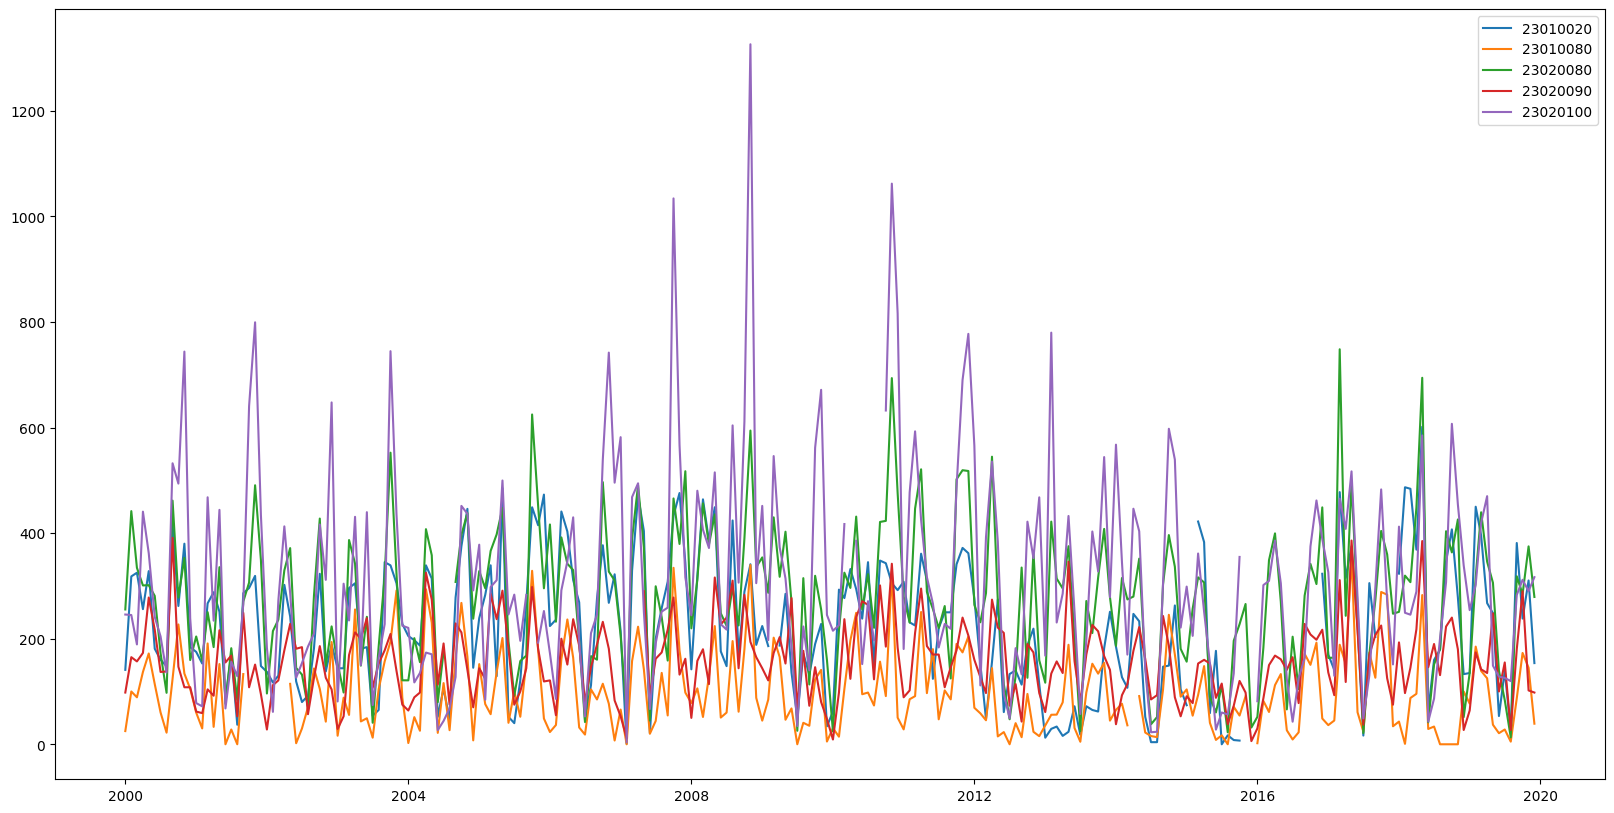

In [9]:
df_reset = df_new.reset_index()

plt.figure(figsize=(20, 10))
for i in range(1, 6):
    plt.plot(df_reset['Fecha'], df_reset.iloc[:, i], label=df_reset.columns[i])
plt.legend()
plt.show()

Separamos cada estacion en un archivo independiente que vamos a guardar usando el numero de la estacion como nombre

In [10]:
# Separamos cada estacion en un archivo independiente que vamos a guardar usando el numero de la estacion como nombre
# Creamos los directorios necesarios
shutil.rmtree('../datos/separados_por_estacion/MAGDALENA_MEDIO', ignore_errors=True)
os.makedirs('../datos/separados_por_estacion/MAGDALENA_MEDIO', exist_ok=True)

df_to_save = df_reset
df_to_save['Fecha'] = pd.to_datetime(df_to_save['Fecha'])

# Separamos la variable fecha en mes(palabra) y año
df_to_save['Mes'] = df_to_save['Fecha'].dt.month_name()
df_to_save['Año'] = df_to_save['Fecha'].dt.year

for i in range(1, len(df_reset.columns)-2):
    df_reset[["Fecha", "Mes", "Año", df_reset.columns[i]]].to_csv(f'../datos/separados_por_estacion/MAGDALENA_MEDIO/{df_reset.columns[i]}.csv', index=False)

In [11]:
import matplotlib.dates as mdates
print(df_reset.columns)
# Creamos una columna con el indice de cada fila
df_reset_p = df_reset.reset_index()
df_reset_p["index"] = df_reset_p.index + 1

# Obtenemos una columna con numpy de 1 y 0 para la primera columna dependiendo si es un valor faltante o no
df_reset_p["is_na"] = np.where(df_reset_p["23080390"].notnull(), 1, 0)
# Multiplicamos la ultima columna por la columna index para obtener un valor que nos permita separar los datos en paquetes
df_reset_p["is_na"] = df_reset_p["is_na"] * df_reset_p["index"]
# Si alguna fila de la nueva columna es igual a 0, lo igualamos al ultimo valor que no es 0
df_reset_p["is_na"] = df_reset_p["is_na"].replace(0, method='ffill')
df_reset_p.head(500)


partes = [(0,60), (60,120), (120,180), (180,240)]
for i in range(1, len(df_reset_p.columns) - 2):
    shutil.rmtree(f'../salidas/MAGDALENA_MEDIO/{df_reset.columns[i]}/graficos_secuencia/', ignore_errors=True)
    path_outputs = f'../salidas/MAGDALENA_MEDIO/{df_reset.columns[i]}/graficos_secuencia/'
    # cada dataframe tiene 240 filas, separamos cada uno en 4 paquetes cada uno con 5 años
    for j in range(0, 4):
        ini = partes[j][0]
        fin = partes[j][1]
        df_reset_file = df_reset_p.iloc[ini:fin, :]
        plt.figure(figsize=(20, 10))
        plt.plot(df_reset_file.iloc[:, -1],  df_reset_file['Fecha'], label=df_reset_file.columns[i], drawstyle='steps-post')

        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        os.makedirs(path_outputs, exist_ok=True)
        plt.legend()
        plt.savefig(f'{path_outputs}{df_reset.columns[i]}_{j+1}.png')
        plt.close()

Index(['Fecha', '23010020', '23010080', '23020080', '23020090', '23020100',
       '23025040', '23040070', '23050080', '23050100',
       ...
       '23210020', '23210120', '23210130', '23210160', '23215030', '23215050',
       '25020970', '26155150', 'Mes', 'Año'],
      dtype='object', name='CodigoEstacion', length=136)
